# Basic Setups & Set-Ups

## Package Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import networkx as nx
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import math
import mpld3
from mpld3 import plugins
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from collections import Counter
import itertools

%matplotlib inline

## DataFrame Creation

In [2]:
slice_wrong = pd.read_csv("./Data/slice_level_oh_tags.csv", low_memory=False)
meta_data = pd.read_csv("./Data/concept_tagging_metadata.csv", low_memory=False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 35)

slice = slice_wrong.copy()

slice['distinctiveness_mean'] = 6 - slice['distinctiveness_mean']

slice

,concept_id,advantage_mean,advantage_stdev,advantage_median,believability_mean,believability_stdev,believability_median,distinctiveness_mean,distinctiveness_stdev,distinctiveness_median,purchase_likelihood_mean,purchase_likelihood_stdev,purchase_likelihood_median,premiumness_mean,premiumness_stdev,premiumness_median,advantage_top_box,...,taste profile_mapped_clean_Sour,cuisines of origin_mapped_clean_Middle Eastern,explicitly claimed health or lifestyle benefits_mapped_clean_Vegan,explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring,explicitly claimed health or lifestyle benefits_mapped_clean_Low calories,explicitly claimed health or lifestyle benefits_mapped_clean_Source of Fibre,textures described_mapped_clean_sticky,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled
0,45561,3.866748,1.012883,4,4.109224,0.959518,4,3.561590,1.293614,2,3.924676,1.180654,4,3.633249,0.856288,4,0.335645,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45562,3.598365,0.993976,4,3.995791,0.855829,4,3.444236,1.257179,3,3.850502,1.180926,4,3.416570,0.915382,3,0.221541,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45563,3.496965,1.045463,3,4.052792,0.896170,4,3.065852,1.298462,3,3.720136,1.152225,4,3.385568,0.947569,3,0.214911,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45564,3.794805,0.866135,4,4.136182,0.847042,4,3.366229,1.247739,3,4.173971,0.947572,4,3.605408,0.828609,3,0.205388,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45565,3.420002,1.048521,3,3.977261,0.938561,4,3.830943,1.168593,2,3.597212,1.444486,4,3.421862,0.852104,3,0.179085,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,147533,3.671478,1.004650,4,4.105840,0.890645,4,3.373505,1.333322,2,4.000096,1.131540,4,3.535410,0.968686,3,0.227194,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
713,147534,3.651767,1.071277,4,4.088976,0.915078,4,3.177538,1.208302,3,3.886853,1.052418,4,3.564584,0.892036,3,0.248357,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714,147535,3.604257,0.979745,4,4.099988,0.846744,4,3.107376,1.234771,3,3.905659,0.950075,4,3.414599,0.936340,3,0.214340,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
715,147536,3.383851,0.967111,3,3.967173,0.844314,4,3.254420,1.261914,3,3.523927,1.239057,4,3.375752,0.916560,3,0.103800,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
metrics_no_dist = ['advantage_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']
average_score = 0
for metric in metrics_no_dist:
    print(slice[metric].mean())
    average_score += slice[metric].mean()

composite_variable = (average_score/4)
print("Composite Variable:", composite_variable)


3.5221597719483957
4.033064545451883
3.7161285603430962
3.465447403733613
Composite Variable: 3.684200070369247


### Binary Tag DataFrame

In [4]:
ts = pd.read_csv("./Data/binary_tag_slice.csv", low_memory=False, index_col=0)

ts

,one or multiple flavors_mapped_clean_One Flavour,one product or product mix_mapped_clean_One Product,ingredients mentioned in the flavor names_mapped_clean_Cheese,types of snack does it describe_mapped_clean_Puffs,types of snack does it describe_mapped_clean_Chips,textures described_mapped_clean_Crispy,textures described_mapped_clean_Crunchy,taste profile_mapped_clean_Cheesy,"when, where or why does it explicitly suggest using or having the snack_mapped_clean_Sharing",shapes mentioned_mapped_clean_Rings,one or multiple flavors_mapped_clean_Multiple Flavours,ingredients mentioned in the flavor names_mapped_clean_Fruit,ingredients mentioned in the flavor names_mapped_clean_Nuts,ingredients mentioned in the flavor names_mapped_clean_Chocolate,types of snack does it describe_mapped_clean_Potato,textures described_mapped_clean_Chewy,taste profile_mapped_clean_Sweet,...,taste profile_mapped_clean_Sour,cuisines of origin_mapped_clean_Middle Eastern,explicitly claimed health or lifestyle benefits_mapped_clean_Vegan,explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring,explicitly claimed health or lifestyle benefits_mapped_clean_Low calories,explicitly claimed health or lifestyle benefits_mapped_clean_Source of Fibre,textures described_mapped_clean_sticky,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled
0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
713,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
714,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
715,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Global Variables

### Creates a list to store tag names

In [5]:
metrics = ['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']

keywords = metrics + ['concept_id']

# Create an empty list to store tags
tags = []

# For every column which includes a tag replace name with that flavor and save to tags list
for str in ts.columns:
    tags.append(str)

# Exploring (Unfiltered) Tag Combinations in a Network Graph

### Finding Tag Combinations in Data

In [6]:
tag_combinations = {}  # Create an empty dictionary to store combinations

for i in range(len(ts)):  # Iterate through rows
    row_tags = [tag for tag in tags if ts[tag].iloc[i] == 1]
    
    if len(row_tags) >= 2:
        tag_pairs = itertools.combinations(row_tags, 2)  # Generate all combinations of 2 tags
        for pair in tag_pairs:
            # Check if the pair is already in the dictionary; if not, add it with count 1, otherwise increment the count
            if pair in tag_combinations:
                tag_combinations[pair] += 1
            else:
                tag_combinations[pair] = 1

# Save the tag_combinations dictionary to a text file
with open('tag_combinations.txt', 'w') as txt_file:
    for pair, count in tag_combinations.items():
        txt_file.write(f"{pair[0]}, {pair[1]}: {count}\n")

print("Tag combinations saved to 'tag_combinations.txt'\n")
print(tag_combinations)

Tag combinations saved to 'tag_combinations.txt'

{('one product or product mix_mapped_clean_One Product', 'types of snack does it describe_mapped_clean_Puffs'): 96, ('one product or product mix_mapped_clean_One Product', 'taste profile_mapped_clean_Cheesy'): 225, ('one product or product mix_mapped_clean_One Product', 'one or multiple flavors_mapped_clean_Multiple Flavours'): 569, ('one product or product mix_mapped_clean_One Product', 'taste profile_mapped_clean_Spicy'): 210, ('one product or product mix_mapped_clean_One Product', 'explicitly claimed health or lifestyle benefits_mapped_clean_High Protein'): 67, ('one product or product mix_mapped_clean_One Product', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Defeat hunger'): 81, ('one product or product mix_mapped_clean_One Product', 'explicitly claimed health or lifestyle benefits_mapped_clean_Nutritious'): 83, ('one product or product mix_mapped_clean_One Product', 'when, where or why does

### Visualizing (Unfiltered) Tag Combinations Network

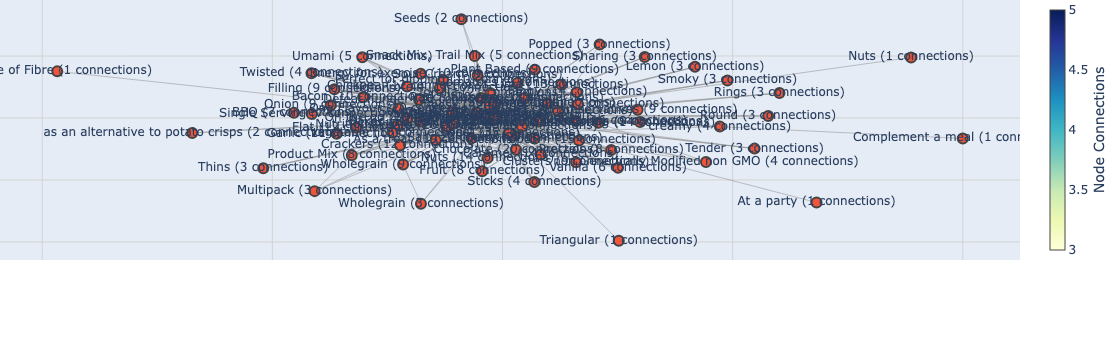

In [31]:
# Set a threshold weight value
threshold_weight = 13 # Adjust this value as needed

# Create an empty graph
G = nx.Graph()

# Iterate through the tag combinations and add them to the graph as weighted edges, but only if the weight exceeds the threshold
for (tag1, tag2), count in tag_combinations.items():
    if count >= threshold_weight:
        G.add_edge(tag1, tag2, weight=count)

# Create a subplot with Plotly
fig = make_subplots(rows=1, cols=1)

# Adjust font size and label positioning
labels = {}
for node in G.nodes():
    neighbor_count = len(list(G.neighbors(node)))  # Calculate the number of connections
    labels[node] = f"{node.split('_mapped_clean_')[-1]} ({neighbor_count} connections)"



# Draw the graph using Plotly
pos = nx.spring_layout(G, seed=24)
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([labels[node]])

# Add nodes and edges to the plot
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Customize the layout
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=100, l=0, r=0, t=0),  # Increase the bottom margin for y-axis space
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    hoverlabel=dict(font=dict(size=16)),  # Customize hover label font size
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

### Creating A List of Tag Networks

In [32]:
# Get connected components as a list of lists of nodes
# returns an iterator over sets of nodes in the graph G, where each set represents a connected component.
connected_components = list(nx.connected_components(G))
print("There are ", len(connected_components[0]), " features")
print(connected_components)

There are  84  features
[{'taste profile_mapped_clean_Savory', 'textures described_mapped_clean_Crunchy', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Defeat hunger', 'ingredients mentioned in the flavor names_mapped_clean_Ranch', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Sharing', 'types of snack does it describe_mapped_clean_Popped', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_On the go', 'shapes mentioned_mapped_clean_Bites', 'ingredients mentioned in the flavor names_mapped_clean_Nuts', 'multipack or single serving_mapped_clean_Multipack', 'types of snack does it describe_mapped_clean_Nuts', 'shapes mentioned_mapped_clean_Thins', 'taste profile_mapped_clean_Cheesy', 'shapes mentioned_mapped_clean_Flat', 'ingredients mentioned in the flavor names_mapped_clean_Vanilla', 'shapes mentioned_mapped_clean_Rings', 'ingredients mentioned in the flavor names_mapped_c

#### Creating & exporting a Dataframe with the top 74 most connected features

In [33]:
# Assuming connected_components[0] is a list of features
features_list = connected_components[0]

shit_to_drop = ['advantage_stdev', 'advantage_median', 'believability_stdev', 'believability_median',
    'distinctiveness_mean', 'distinctiveness_stdev', 'distinctiveness_median', 'purchase_likelihood_stdev',
    'purchase_likelihood_median', 'premiumness_stdev', 'premiumness_median',
    'advantage_top_box', 'distinctiveness_top_box',
    'purchase_likelihood_top_box', 'believability_top_box', 'premiumness_top_box']

print(metrics)

filtered_columns = list(set(metrics).union(features_list))

prototype_frame = slice[filtered_columns].copy()

# Rearrange the columns to have metrics first
prototype_frame = slice[metrics + [col for col in slice.columns if col not in metrics]].copy()

# Create a new column for the mean of all metrics except distinctiveness_mean
prototype_frame['mean_of_metrics'] = prototype_frame[metrics].mean(axis=1)

pf = prototype_frame.drop(shit_to_drop, axis=1)

pf.to_csv('Data/prototype_frame.csv')

pf

['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']


,advantage_mean,believability_mean,purchase_likelihood_mean,premiumness_mean,concept_id,one or multiple flavors_mapped_clean_One Flavour,one product or product mix_mapped_clean_One Product,ingredients mentioned in the flavor names_mapped_clean_Cheese,types of snack does it describe_mapped_clean_Puffs,types of snack does it describe_mapped_clean_Chips,textures described_mapped_clean_Crispy,textures described_mapped_clean_Crunchy,taste profile_mapped_clean_Cheesy,"when, where or why does it explicitly suggest using or having the snack_mapped_clean_Sharing",shapes mentioned_mapped_clean_Rings,one or multiple flavors_mapped_clean_Multiple Flavours,ingredients mentioned in the flavor names_mapped_clean_Fruit,...,cuisines of origin_mapped_clean_Middle Eastern,explicitly claimed health or lifestyle benefits_mapped_clean_Vegan,explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring,explicitly claimed health or lifestyle benefits_mapped_clean_Low calories,explicitly claimed health or lifestyle benefits_mapped_clean_Source of Fibre,textures described_mapped_clean_sticky,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled,mean_of_metrics
0,3.866748,4.109224,3.924676,3.633249,45561,0,1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.819097
1,3.598365,3.995791,3.850502,3.416570,45562,0,1,1,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.661093
2,3.496965,4.052792,3.720136,3.385568,45563,0,1,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.544262
3,3.794805,4.136182,4.173971,3.605408,45564,0,1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.815319
4,3.420002,3.977261,3.597212,3.421862,45565,0,1,1,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.649456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,3.671478,4.105840,4.000096,3.535410,147533,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.737266
713,3.651767,4.088976,3.886853,3.564584,147534,0,1,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.673944
714,3.604257,4.099988,3.905659,3.414599,147535,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.626376
715,3.383851,3.967173,3.523927,3.375752,147536,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.501025


In [10]:
features = nx.community.louvain_communities(G, seed=123)

In [11]:
print(len(features))
print(features)

3
[{'types of snack does it describe_mapped_clean_Chips', 'explicitly claimed health or lifestyle benefits_mapped_clean_Filling', 'explicitly claimed health or lifestyle benefits_mapped_clean_Plant Based', 'textures described_mapped_clean_Crunchy', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Defeat hunger', 'ingredients mentioned in the flavor names_mapped_clean_Bacon', 'shapes mentioned_mapped_clean_Clusters', 'textures described_mapped_clean_creamy', 'types of snack does it describe_mapped_clean_Snack Mix, Trail Mix', 'ingredients mentioned in the flavor names_mapped_clean_Ranch', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping', 'ingredients mentioned in the flavor names_mapped_clean_Sweet Chili', 'one product or product mix_mapped_clean_One Product', 'ingredients mentioned in the flavor names_mapped_clean_Garlic', 'when, where or why does it explicitly suggest using or having the sna

In [12]:
# Sort the tag combinations dictionary by count in descending order
sorted_combinations = sorted(tag_combinations.items(), key=lambda x: x[1], reverse=True)

# Calculate the threshold for the top 1%
total_combinations = len(sorted_combinations)
top_1_percent_threshold = int(total_combinations * 0.01)

# Select the top 1% combinations with the highest counts
top_1_percent_combinations = sorted_combinations[:top_1_percent_threshold]

# Print the top 1% combinations
#for combination, count in top_10_percent_combinations:
 #   print(combination, count)

print(top_1_percent_combinations)

[(('one product or product mix_mapped_clean_One Product', 'one or multiple flavors_mapped_clean_Multiple Flavours'), 569), (('one product or product mix_mapped_clean_One Product', 'textures described_mapped_clean_Crunchy'), 414), (('one product or product mix_mapped_clean_One Product', 'ingredients mentioned in the flavor names_mapped_clean_Cheese'), 388), (('ingredients mentioned in the flavor names_mapped_clean_Cheese', 'one or multiple flavors_mapped_clean_Multiple Flavours'), 370), (('textures described_mapped_clean_Crunchy', 'one or multiple flavors_mapped_clean_Multiple Flavours'), 368), (('one product or product mix_mapped_clean_One Product', 'types of snack does it describe_mapped_clean_Chips'), 331), (('types of snack does it describe_mapped_clean_Chips', 'one or multiple flavors_mapped_clean_Multiple Flavours'), 308), (('one product or product mix_mapped_clean_One Product', 'textures described_mapped_clean_Crispy'), 289), (('ingredients mentioned in the flavor names_mapped_cl

## Jaccard Similarity Of Tags

### Visualising The Distribution Of Pairwise Tag Jaccard Similarity

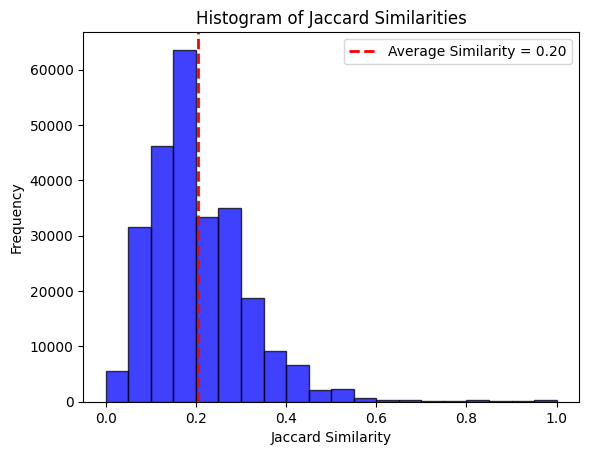

In [13]:
# Calculate the Jaccard distances
jaccard_dist = pdist(ts.values, metric='jaccard')

# Convert the distances to similarities
jaccard_sim = 1 - jaccard_dist

# Calculate the average similarity
average_similarity = np.mean(jaccard_sim)

# Create a histogram of Jaccard similarities
plt.hist(jaccard_sim, bins=20, alpha=0.75, color='b', edgecolor='k')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Similarities')
plt.axvline(average_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Average Similarity = {average_similarity:.2f}')
plt.legend()
plt.show()

### Filtering The Distribution By Standard Deviation / Interquartile Range

In [14]:
print(len(jaccard_sim))
print(len(ts.values))

# Calculate the standard deviation of jaccard_sim
std_deviation = np.std(jaccard_sim)

# Define a threshold (e.g., 1 standard deviation above the mean)
threshold = average_similarity + std_deviation

# Create an empty list to store values above the threshold
above_threshold_values = []

# Iterate through jaccard_sim and add values above the threshold to the list
for value in jaccard_sim:
    if value > threshold:
        above_threshold_values.append(value)

256686
717


### Creating A Histogram Of Values Above The Defined Threshold

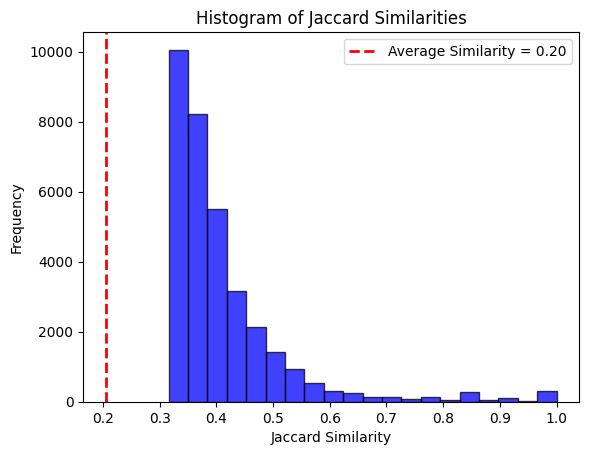

In [15]:
# Create a histogram of Jaccard similarities
plt.hist(above_threshold_values, bins=20, alpha=0.75, color='b', edgecolor='k')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Similarities')
plt.axvline(average_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Average Similarity = {average_similarity:.2f}')
plt.legend()
plt.show()

In [16]:
print(len(jaccard_sim))
print(len(ts.columns))

256686
189


In [17]:
print(ts.values)

[[0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [18]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Assuming ts is your original DataFrame with 717 rows and 189 columns
# Transpose the DataFrame to calculate Jaccard similarities between columns
ts_transposed = ts.transpose()

# Calculate the Jaccard distances
df_jaccard_sim = 1 - pdist(ts_transposed.values, metric='jaccard')

# Create a square similarity matrix
square_matrix = squareform(df_jaccard_sim)

# Prints the size of the square_matrix
matrix_shape = square_matrix.shape
print(matrix_shape)

# Create a DataFrame from the square matrix
jaccard_df = pd.DataFrame(square_matrix, columns=ts.columns, index=ts.columns)

jaccard_df

(189, 189)


,one or multiple flavors_mapped_clean_One Flavour,one product or product mix_mapped_clean_One Product,ingredients mentioned in the flavor names_mapped_clean_Cheese,types of snack does it describe_mapped_clean_Puffs,types of snack does it describe_mapped_clean_Chips,textures described_mapped_clean_Crispy,textures described_mapped_clean_Crunchy,taste profile_mapped_clean_Cheesy,"when, where or why does it explicitly suggest using or having the snack_mapped_clean_Sharing",shapes mentioned_mapped_clean_Rings,one or multiple flavors_mapped_clean_Multiple Flavours,ingredients mentioned in the flavor names_mapped_clean_Fruit,ingredients mentioned in the flavor names_mapped_clean_Nuts,ingredients mentioned in the flavor names_mapped_clean_Chocolate,types of snack does it describe_mapped_clean_Potato,textures described_mapped_clean_Chewy,taste profile_mapped_clean_Sweet,...,taste profile_mapped_clean_Sour,cuisines of origin_mapped_clean_Middle Eastern,explicitly claimed health or lifestyle benefits_mapped_clean_Vegan,explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring,explicitly claimed health or lifestyle benefits_mapped_clean_Low calories,explicitly claimed health or lifestyle benefits_mapped_clean_Source of Fibre,textures described_mapped_clean_sticky,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled
one or multiple flavors_mapped_clean_One Flavour,0.000000,0.140969,0.078891,0.061856,0.102439,0.126761,0.137421,0.093548,0.033333,0.017391,0.017316,0.014815,0.034247,0.017442,0.044248,0.027273,0.078189,...,0.009901,0.010000,0.000000,0.041379,0.000000,0.018018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
one product or product mix_mapped_clean_One Product,0.140969,0.000000,0.558273,0.139738,0.474212,0.420058,0.590585,0.325615,0.035451,0.022091,0.798036,0.046921,0.061224,0.094614,0.181686,0.013216,0.214182,...,0.002954,0.001477,0.002954,0.072165,0.007353,0.019202,0.004431,0.001477,0.002954,0.001477,0.001477,0.001477,0.001477,0.001477,0.001475,0.001477,0.001477
ingredients mentioned in the flavor names_mapped_clean_Cheese,0.078891,0.558273,0.000000,0.182448,0.380692,0.295413,0.450172,0.550481,0.026253,0.029197,0.577223,0.020737,0.031603,0.021231,0.129167,0.016990,0.090211,...,0.002457,0.000000,0.000000,0.052995,0.007299,0.021951,0.004914,0.002463,0.000000,0.002463,0.000000,0.000000,0.002463,0.000000,0.004926,0.002463,0.000000
types of snack does it describe_mapped_clean_Puffs,0.061856,0.139738,0.182448,0.000000,0.108959,0.074074,0.105691,0.259124,0.056911,0.033613,0.154221,0.014184,0.012903,0.034286,0.056769,0.000000,0.076305,...,0.000000,0.000000,0.018868,0.053691,0.027027,0.043860,0.009259,0.009434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009346,0.000000,0.000000
types of snack does it describe_mapped_clean_Chips,0.102439,0.474212,0.380692,0.108959,0.000000,0.293651,0.376307,0.221074,0.032967,0.016529,0.474576,0.034574,0.044041,0.094872,0.201970,0.016713,0.139690,...,0.005682,0.000000,0.005682,0.054974,0.014085,0.016713,0.005666,0.000000,0.005682,0.000000,0.002841,0.002841,0.002841,0.002841,0.002833,0.000000,0.002841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
preparation or cooking method_mapped_clean_Charred,0.000000,0.001477,0.002463,0.000000,0.002841,0.000000,0.002283,0.000000,0.000000,0.000000,0.001653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [19]:
# Calculate the means for each column in the DataFrame
column_means = jaccard_df.mean()

# Print the column means
print(column_means)


one or multiple flavors_mapped_clean_One Flavour                 0.025161
one product or product mix_mapped_clean_One Product              0.053031
ingredients mentioned in the flavor names_mapped_clean_Cheese    0.047882
types of snack does it describe_mapped_clean_Puffs               0.022951
types of snack does it describe_mapped_clean_Chips               0.044481
                                                                   ...   
preparation or cooking method_mapped_clean_Charred               0.000393
taste profile_mapped_clean_Tart                                  0.000447
taste profile_mapped_clean_Caramelized                           0.003563
preparation or cooking method_mapped_clean_Pressure cooked       0.001097
preparation or cooking method_mapped_clean_Grilled               0.001056
Length: 189, dtype: float64


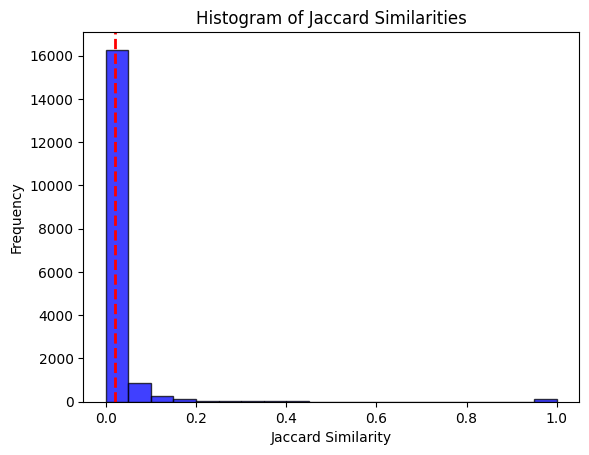

In [20]:
jaccard_sim_average = df_jaccard_sim.mean()

# Create a histogram of Jaccard similarities
plt.hist(df_jaccard_sim, bins=20, alpha=0.75, color='b', edgecolor='k')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Similarities')
plt.axvline(jaccard_sim_average, color='r', linestyle='dashed', linewidth=2, label=f'Average Similarity = {jaccard_sim_average:.2f}')
plt.show()

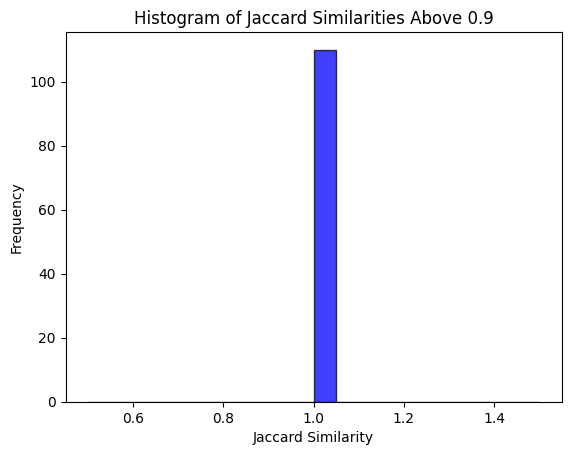

In [21]:
# Filter out values above 0.4
filtered_jaccard_sim = df_jaccard_sim[df_jaccard_sim > 0.9]

# Create a histogram of filtered Jaccard similarities
plt.hist(filtered_jaccard_sim, bins=20, alpha=0.75, color='b', edgecolor='k')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Similarities Above 0.9')
plt.show()

In [22]:
# Assuming jaccard_df is your DataFrame
row_name = 'cuisines of origin_mapped_clean_Greek'
column_name = 'cuisines of origin_mapped_clean_Moroccan'

# Find the value where the row and column intersect
value = jaccard_df.loc[row_name, column_name]

print(f"The value at {row_name} and {column_name} is: {value}")

The value at cuisines of origin_mapped_clean_Greek and cuisines of origin_mapped_clean_Moroccan is: 1.0


In [23]:
print(len(tag_combinations))

4943


In [24]:
# Assuming you want to calculate the mean for the "Cheese" column
one_product_column = jaccard_df['one product or product mix_mapped_clean_One Product']

# Calculate the mean of the "Cheese" column
one_product_mean = one_product_column.mean()

print(f"The mean value for the 'One Product' column is: {one_product_mean}")

The mean value for the 'One Product' column is: 0.053031302756323576


## Feature Engineering DataFrame

In [34]:
continuous_vars = ['advantage_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']

# Create a DataFrame for the continuous variables
continuous_data = slice[continuous_vars]

for feature in features[0]:
    print(slice[feature].name.split('_mapped_clean_')[-1])

selected_columns = continuous_vars + [col for col in slice.columns if col in features[0]]

# Create a new DataFrame using the selected columns
powerful_feature_df = slice[selected_columns]

# Display the new DataFrame
powerful_feature_df

Chips
Filling
Plant Based
Crunchy
Defeat hunger
Bacon
Clusters
creamy
Snack Mix, Trail Mix
Ranch
Perfect for dipping
Sweet Chili
One Product
Garlic
Entertaining guests
Chickpea
Jalapeno
On the go
BBQ
Bites
Cheese
Crisps
Product Mix
No artificial colouring
Tangy
Sour Cream
Tomatoes
Energy for exercise
Spicy
Pretzels
Wholegrain
Cheesy
Tortilla
High Protein
Onion
Puffs
Single Serving
No preservatives
One Flavour
Lime
Multiple Flavours


,advantage_mean,believability_mean,purchase_likelihood_mean,premiumness_mean,one or multiple flavors_mapped_clean_One Flavour,one product or product mix_mapped_clean_One Product,ingredients mentioned in the flavor names_mapped_clean_Cheese,types of snack does it describe_mapped_clean_Puffs,types of snack does it describe_mapped_clean_Chips,textures described_mapped_clean_Crunchy,taste profile_mapped_clean_Cheesy,one or multiple flavors_mapped_clean_Multiple Flavours,shapes mentioned_mapped_clean_Clusters,one product or product mix_mapped_clean_Product Mix,ingredients mentioned in the flavor names_mapped_clean_Sour Cream,ingredients mentioned in the flavor names_mapped_clean_Ranch,ingredients mentioned in the flavor names_mapped_clean_Tomatoes,...,ingredients mentioned in the flavor names_mapped_clean_BBQ,taste profile_mapped_clean_Tangy,multipack or single serving_mapped_clean_Single Serving,"types of snack does it describe_mapped_clean_Snack Mix, Trail Mix",ingredients mentioned in the flavor names_mapped_clean_Garlic,types of snack does it describe_mapped_clean_Wholegrain,types of snack does it describe_mapped_clean_Pretzels,textures described_mapped_clean_creamy,ingredients mentioned in the flavor names_mapped_clean_Bacon,types of snack does it describe_mapped_clean_Crisps,explicitly claimed health or lifestyle benefits_mapped_clean_Filling,types of snack does it describe_mapped_clean_Chickpea,"when, where or why does it explicitly suggest using or having the snack_mapped_clean_Energy for exercise",ingredients mentioned in the flavor names_mapped_clean_Onion,explicitly claimed health or lifestyle benefits_mapped_clean_Plant Based,explicitly claimed health or lifestyle benefits_mapped_clean_No preservatives,explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring
0,3.866748,4.109224,3.924676,3.633249,0,1,0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.598365,3.995791,3.850502,3.416570,0,1,1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.496965,4.052792,3.720136,3.385568,0,1,1,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.794805,4.136182,4.173971,3.605408,0,1,1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.420002,3.977261,3.597212,3.421862,0,1,1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,3.671478,4.105840,4.000096,3.535410,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
713,3.651767,4.088976,3.886853,3.564584,0,1,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
714,3.604257,4.099988,3.905659,3.414599,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
715,3.383851,3.967173,3.523927,3.375752,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [26]:
# Create a boolean mask for rows where all columns except those in the exclude list are equal to 1
mask = (powerful_feature_df.drop(continuous_vars, axis=1) == 1).all(axis=1)

# Use the mask to filter the DataFrame
result = powerful_feature_df[mask]

print(result)

Empty DataFrame
Columns: [advantage_mean, believability_mean, purchase_likelihood_mean, premiumness_mean, one or multiple flavors_mapped_clean_One Flavour, one product or product mix_mapped_clean_One Product, ingredients mentioned in the flavor names_mapped_clean_Cheese, types of snack does it describe_mapped_clean_Puffs, types of snack does it describe_mapped_clean_Chips, textures described_mapped_clean_Crunchy, taste profile_mapped_clean_Cheesy, one or multiple flavors_mapped_clean_Multiple Flavours, shapes mentioned_mapped_clean_Clusters, one product or product mix_mapped_clean_Product Mix, ingredients mentioned in the flavor names_mapped_clean_Sour Cream, ingredients mentioned in the flavor names_mapped_clean_Ranch, ingredients mentioned in the flavor names_mapped_clean_Tomatoes, types of snack does it describe_mapped_clean_Tortilla, taste profile_mapped_clean_Spicy, when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping, when, wher

### Converts Jupyter Notebook as a Python File

In [27]:
import nbformat

# Replace 'your_notebook.ipynb' with the path to your Jupyter Notebook file.
notebook_file = 'i_data_exploration.ipynb'

# Read the notebook file.
with open(notebook_file, 'r', encoding='utf-8') as notebook_file:
    notebook_content = nbformat.read(notebook_file, as_version=4)

# Initialize an empty string to store the concatenated code.
concatenated_code = ''

# Iterate through the notebook cells and append code cells to the concatenated_code.
for cell in notebook_content.cells:
    if cell.cell_type == 'code':
        concatenated_code += cell.source + '\n\n'

# Write the concatenated code to a Python script file.
with open('analysis.py', 'w', encoding='utf-8') as script_file:
    script_file.write(concatenated_code)


NameError: name 'combination_frame' is not defined